In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

1. Load the dataset and explore the variables.

In [2]:
customer_churn = pd.read_csv('customer_churn.csv')
customer_churn.head(5)
display(customer_churn)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
display(customer_churn.describe())

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges

In [4]:
# Chek for collinearity
# Transform NO,YES into 0,1

In [5]:
# X/y Split

X = customer_churn[['tenure','SeniorCitizen','MonthlyCharges']]
y = customer_churn["Churn"]
y.replace(('Yes','No'),(1,0),inplace=True)
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

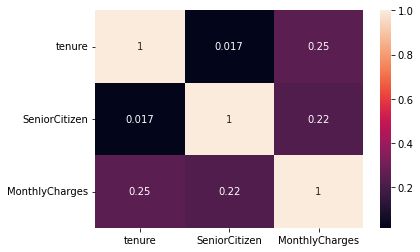

In [6]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [7]:
# No need to eliminate anything because of collinearity since the columns are not highly correlated
# to each other

3. Extract the target variable.

In [8]:
customer_churn['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

4. Extract the independent variables and scale them.

In [9]:
X

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

In [12]:
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well

In [13]:
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [14]:
y_train.head()

3296    0
6397    0
6043    1
5309    0
3000    1
Name: Churn, dtype: int64

In [15]:
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...

In [16]:
y_train = y_train.reset_index(drop=True) 

In [17]:
y_test = y_test.reset_index(drop=True) 

In [18]:
y_train.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

5. Build the logistic regression model.

In [19]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [20]:
# We will test if tenure, SeniorCitizen and MOnthlyCharges are actually linear (assumption: linear relation)

In [21]:
LR.predict_proba(X_train_scaled)

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

In [22]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

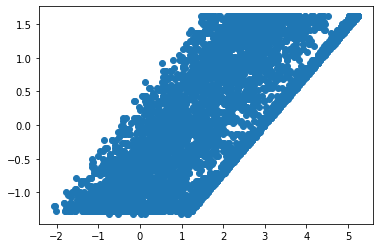

In [23]:
plt.scatter(logits,X_train_scaled['tenure'])

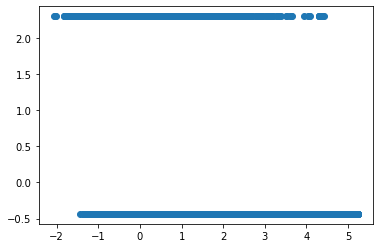

In [24]:
plt.scatter(logits,X_train_scaled['SeniorCitizen'])

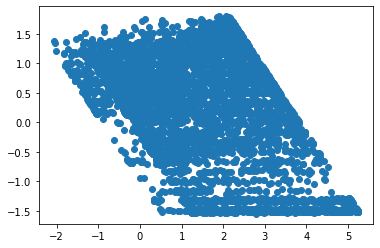

In [25]:
plt.scatter(logits,X_train_scaled['MonthlyCharges'])

In [26]:
# Imbalance and Metric
# checking for imbalance

In [27]:
count_classes = customer_churn['Churn'].value_counts()
count_classes

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:>

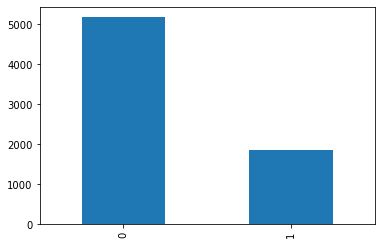

In [28]:
count_classes.plot(kind = 'bar')

In [29]:
5174/(5174+1869) 
# proportion of imbalance

0.7346301292063041

 6. Evaluate the model

In [30]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [31]:
# 78% accuracy

7. Even a simple model will give us more than 70% accuracy. Why?

In [32]:
# The model accurately predicted 'No' in over 70% of the case when people did not churn,
# which is a pretty good outcome.

Oversampling (to compare results)

In [33]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,0
1,0.883210,2.296336,0.017840,0
2,-1.196572,-0.435476,-0.819594,1
3,1.168670,-0.435476,-1.483535,0
4,-0.829552,-0.435476,0.658427,1


In [34]:
# separate majority/minority classes
no_churn = train[train['Churn']==0]
yes_churn = train[train['Churn']==1]

In [35]:
display(no_churn.shape)
display(yes_churn.shape)

(3876, 4)

(1406, 4)

In [37]:
# oversample minority
no_churn_oversampled = resample(no_churn, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(yes_churn),#<- make both sets the same size
                                    random_state=0)

In [38]:
# both sets are of equal size
display(no_churn_oversampled.shape)
display(yes_churn.shape)

(1406, 4)

(1406, 4)

In [39]:
# Concat the samples

In [40]:
train_oversampled = pd.concat([yes_churn,no_churn_oversampled],axis=0)
train_oversampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
2,-1.196572,-0.435476,-0.819594,1
4,-0.829552,-0.435476,0.658427,1
12,-1.115012,-0.435476,0.630068,1
13,-1.237352,-0.435476,0.199673,1
15,-1.155792,-0.435476,0.698464,1


In [41]:
# Seperate again
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [42]:
# Build logistic regression model agaiin with oversized data

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4796511627906977
recall:  0.712742980561555
f1:  0.5734144222415292


## Smote


Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [43]:
sm = SMOTE(random_state=100,k_neighbors=3)

#fitting and resample 
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [47]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

In [48]:
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [49]:
X_train_SMOTE.shape

(7752, 3)

In [50]:
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]], dtype=int64)

In [51]:
940/(940+133)
# predict no

0.8760484622553588

In [52]:
358/(358+330) 
# predict yes

0.5203488372093024

In [ ]:
# This means that everytime we predict YES we have an accuracy of 52.03%

In [ ]:
# This means that everytime we predict NO we have an accuracy of 87.60%
# accuracy improved